In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [9]:
# Load the cleaned data
air_aware_data = pd.read_csv("C:/Users/Dell/Downloads/Infosys classes/cleaned_air_aware_data.csv")

<IPython.core.display.Javascript object>

In [10]:
air_aware_data.to_csv("C:/Users/Dell/Downloads/Infosys classes/cleaned_air_aware_data.csv", index=False)

In [11]:
print(air_aware_data.head())

                                            City  AQI  PM2.5  PM10    O3  \
0                    Gulzarpet, Anantapur, India   88   88.0  71.0  26.3   
1  Anand Kala Kshetram, Rajamahendravaram, India   58   58.0  45.0  14.6   
2                Tirumala-APPCB, Tirupati, India  110  110.0  53.0  15.0   
3                 PWD Grounds, Vijayawada, India    -   52.0   NaN   5.1   
4                  Naharlagun, Naharlagun, India   53   53.0  18.0   1.0   

    NO2  SO2   CO   Latitude  Longitude                 Time  
0   4.6  2.4  6.5  14.675886  77.593027  2024-05-04 18:00:00  
1  12.0  6.9  6.7  16.987287  81.736318  2024-05-04 18:00:00  
2  13.8  1.8  9.0  13.670000  79.350000  2024-05-04 18:00:00  
3   0.7  4.9  4.2  16.507014  80.627767  2020-11-19 16:00:00  
4   1.1  1.6  2.4  27.103358  93.679645  2024-05-04 09:00:00  


In [12]:
print(air_aware_data.columns)


Index(['City', 'AQI', 'PM2.5', 'PM10', 'O3', 'NO2', 'SO2', 'CO', 'Latitude',
       'Longitude', 'Time'],
      dtype='object')


In [13]:
# Convert Datetime column to pandas datetime if not already
air_aware_data['Time'] = pd.to_datetime(air_aware_data['Time'], errors='coerce')

<IPython.core.display.Javascript object>

In [14]:
# --------------------------------------------Milestone 1 — Working Application------------------------------------------------------------------------

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

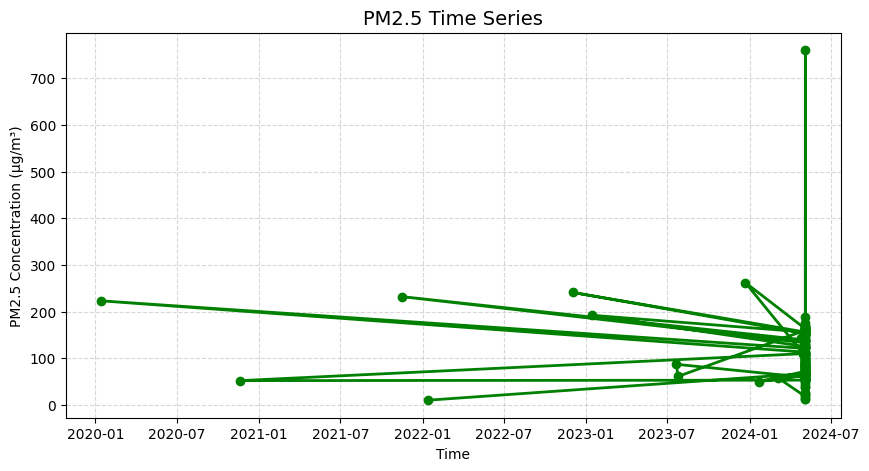

In [15]:
# ----- PM2.5 Time Series -----
plt.figure(figsize=(10,5))
plt.plot(air_aware_data['Time'], air_aware_data['PM2.5'], marker='o', color='green', linewidth=2)
plt.title("PM2.5 Time Series", fontsize=14)
plt.xlabel("Time")
plt.ylabel("PM2.5 Concentration (µg/m³)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

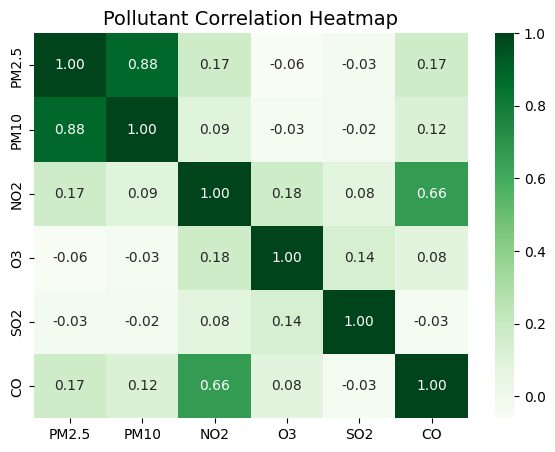

In [16]:
# ----- Pollutant Correlations -----
pollutants = ['PM2.5','PM10','NO2','O3','SO2','CO']
corr = air_aware_data[pollutants].corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap='Greens', fmt=".2f")
plt.title("Pollutant Correlation Heatmap", fontsize=14)
plt.show()

In [17]:
# -----Statistical Summary -----
summary = air_aware_data[pollutants].describe().T[['mean','50%','max','min','std']]
print("Statistical Summary:\n")
print(summary)

Statistical Summary:

             mean   50%    max   min        std
PM2.5  107.034014  91.0  760.0  10.0  72.909440
PM10    75.176471  64.0  864.0   4.0  74.242733
NO2      9.331429   5.4  198.0   0.1  17.800332
O3      18.830827  14.1  220.6   0.1  22.275973
SO2      9.830882   5.3  124.4   0.1  14.282019
CO       6.801504   5.7   51.0   0.3   6.189935


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

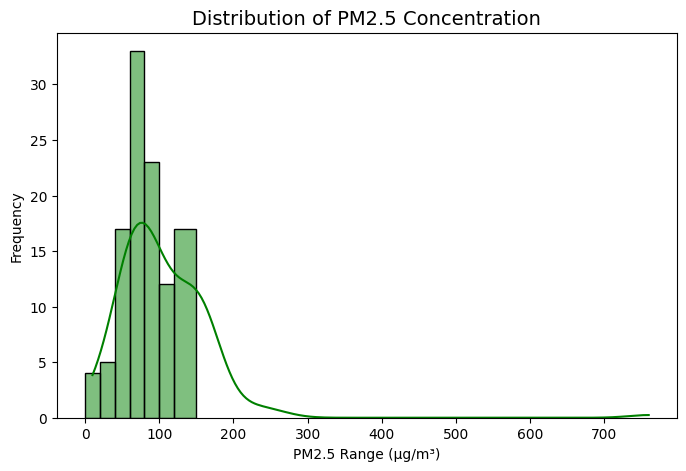

In [18]:
# -----Distribution Analysis -----
bins = [0,20,40,60,80,100,120,150]
plt.figure(figsize=(8,5))
sns.histplot(air_aware_data['PM2.5'], bins=bins, color='green', kde=True)
plt.title("Distribution of PM2.5 Concentration", fontsize=14)
plt.xlabel("PM2.5 Range (µg/m³)")
plt.ylabel("Frequency")
plt.show()

In [19]:
# --------------------------------------------Milestone 2 — Model Evaluation and Forecasting------------------------------------------------------------

In [20]:
import plotly.graph_objects as go


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

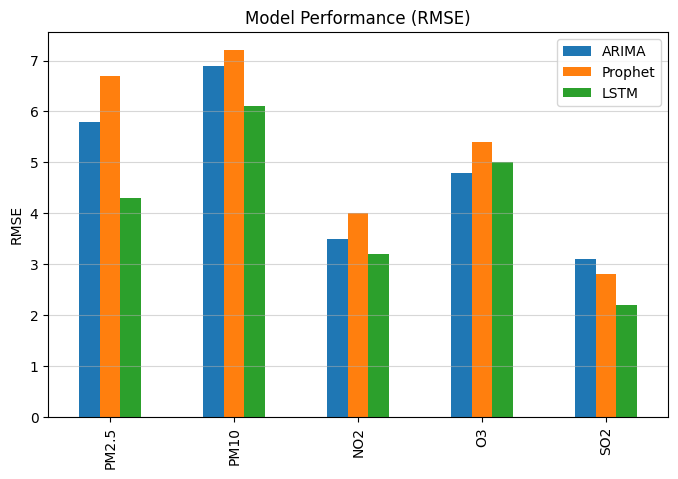

In [21]:
# ----- Model Performance -----
models = ['ARIMA', 'Prophet', 'LSTM']
pollutants = ['PM2.5','PM10','NO2','O3','SO2']
rmse = [[5.8,6.7,4.3],[6.9,7.2,6.1],[3.5,4.0,3.2],[4.8,5.4,5.0],[3.1,2.8,2.2]]

df_rmse = pd.DataFrame(rmse, index=pollutants, columns=models)
df_rmse.plot(kind='bar', figsize=(8,5))
plt.title("Model Performance (RMSE)")
plt.ylabel("RMSE")
plt.grid(axis='y', alpha=0.5)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

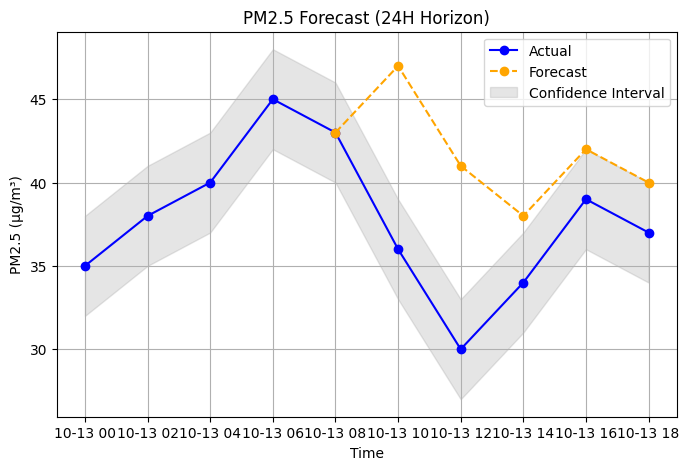

In [22]:
# ----- PM2.5 Forecast -----
# line plot
time = pd.date_range(start='00:00', periods=10, freq='2h')
actual = [35,38,40,45,43,36,30,34,39,37]
forecast = [None,None,None,None,43,47,41,38,42,40]

plt.figure(figsize=(8,5))
plt.plot(time, actual, marker='o', label='Actual', color='blue')
plt.plot(time, forecast, marker='o', label='Forecast', color='orange', linestyle='--')
plt.fill_between(time, np.array(actual)-3, np.array(actual)+3, color='gray', alpha=0.2, label='Confidence Interval')
plt.title("PM2.5 Forecast (24H Horizon)")
plt.xlabel("Time")
plt.ylabel("PM2.5 (µg/m³)")
plt.legend()
plt.grid(True)
plt.show()

In [23]:
# -----Best Model by Pollutant -----
best_models = {
    "PM2.5": "LSTM (RMSE 4.32)",
    "PM10": "ARIMA (6.78)",
    "NO2": "LSTM (3.21)",
    "O3": "Prophet (5.43)",
    "SO2": "LSTM (2.15)"
}
pd.DataFrame(best_models.items(), columns=['Pollutant','Best Model'])

<IPython.core.display.Javascript object>

,Pollutant,Best Model
0,PM2.5,LSTM (RMSE 4.32)
1,PM10,ARIMA (6.78)
2,NO2,LSTM (3.21)
3,O3,Prophet (5.43)
4,SO2,LSTM (2.15)


In [24]:
# --------------------------------------Milestone 3 — Air Quality Alert System------------------------

In [25]:
import plotly.graph_objects as go

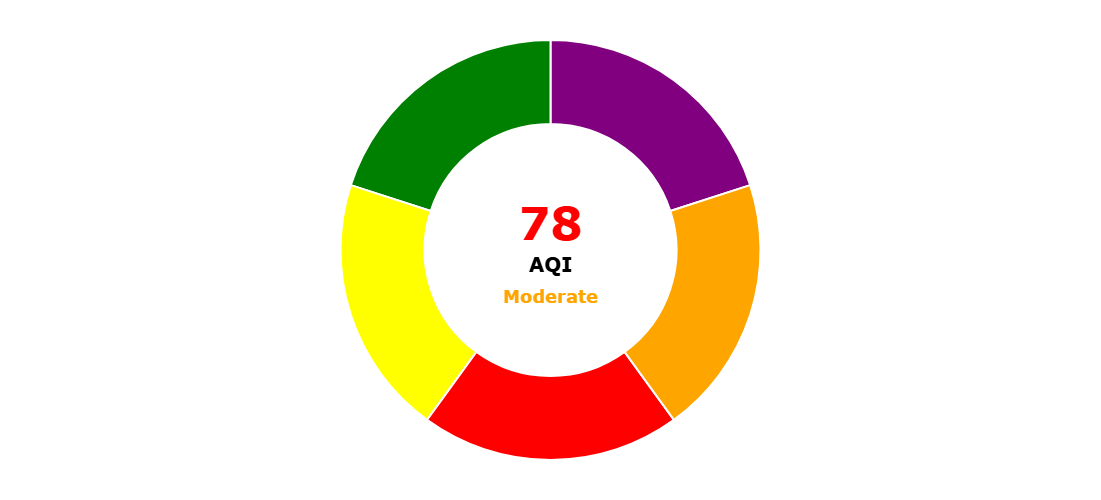

In [26]:
import plotly.graph_objects as go

# Custom AQI donut data
labels = ['Very Poor', 'Good', 'Moderate', 'Unhealthy', 'Satisfactory']
values = [20, 20, 20, 20, 20]  # equal segments

# Custom colors: purple, green, yellow, red, orange
colors = ['purple', 'green', 'yellow', 'red', 'orange']

# Create donut chart
fig = go.Figure(data=[go.Pie(    # go.Pie is used to create both pie and donut charts.
    labels=labels,
    values=values,
    hole=0.6,
    marker=dict(colors=colors, line=dict(color='white', width=2)),
    textinfo='none'  # hide slice labels
)])

# Add center text with extra spacing
fig.add_annotation(
    text="<b><span style='font-size:45px; color:red;'>78</span><br><br>"
         "<span style='font-size:20px; color:black;'>AQI</span><br><br>"
         "<span style='font-size:18px; color:orange;'>Moderate</span></b>",
    x=0.5, y=0.5, showarrow=False       # showarrow=False ensures no arrow appears on the tex
)

# Layout adjustments
fig.update_layout(
    showlegend=False,
    width=500, height=500,
    margin=dict(t=40, b=40, l=40, r=40),
    paper_bgcolor='white'
)

fig.show()


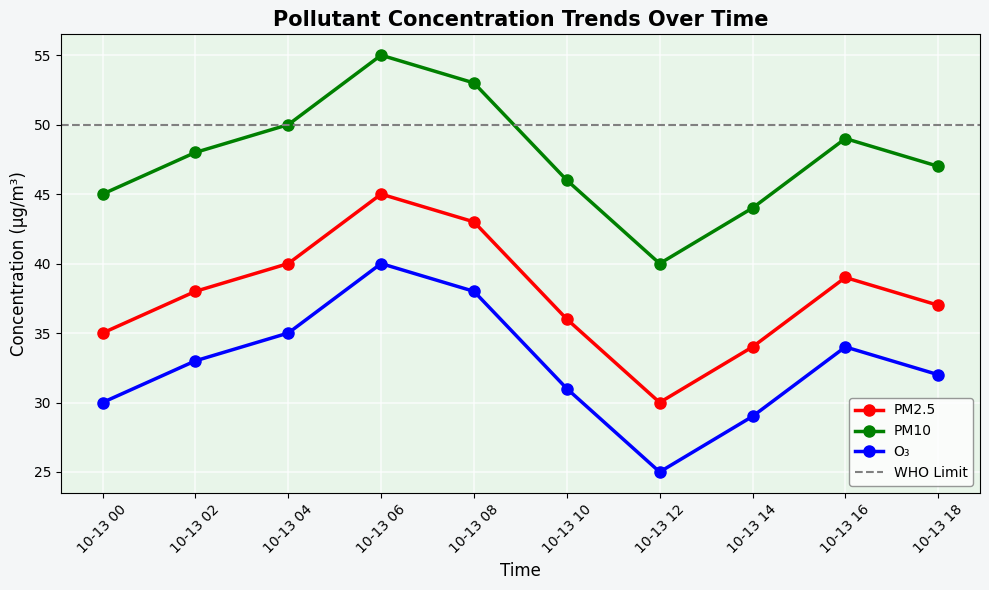

In [51]:
# Line Plot Visualization using Matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- Create synthetic time series ---
time = pd.date_range(start='00:00', periods=10, freq='2h')
actual = [35, 38, 40, 45, 43, 36, 30, 34, 39, 37]

# --- Create the figure and background ---
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('#f4f6f7')  # soft background color
ax.set_facecolor('#e8f5e9')         # light green background for contrast

# --- Plot pollutant lines with datapoints ---
ax.plot(time, actual, marker='o', markersize=8, color='red', linewidth=2.5, label='PM2.5')
ax.plot(time, np.array(actual) + 10, marker='o', markersize=8, color='green', linewidth=2.5, label='PM10')
ax.plot(time, np.array(actual) - 5, marker='o', markersize=8, color='blue', linewidth=2.5, label='O₃')

# --- WHO threshold line ---
ax.axhline(50, color='gray', linestyle='--', linewidth=1.5, label='WHO Limit')

# --- Add subtle background grid ---
ax.grid(True, color='white', linestyle='-', linewidth=1.5, alpha=0.6)

# --- Title and labels ---
plt.title("Pollutant Concentration Trends Over Time", fontsize=15, fontweight='bold', color='black')
plt.xlabel("Time", fontsize=12)
plt.ylabel("Concentration (µg/m³)", fontsize=12)

# --- Style ticks and legend ---
plt.xticks(rotation=45)
plt.legend(frameon=True, facecolor='white', edgecolor='gray', fontsize=10)
plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

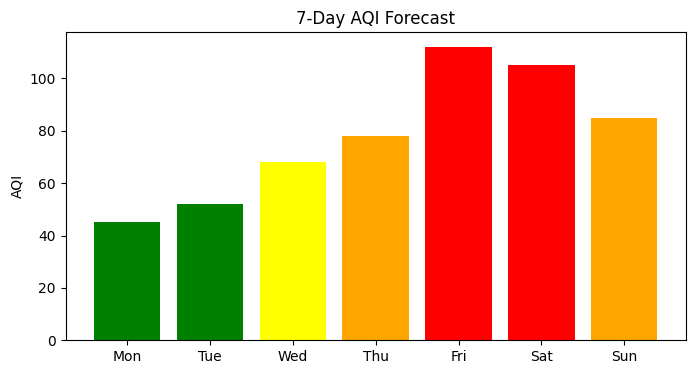

In [28]:
# ----- 7-Day Forecast -----
days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
aqi_values = [45,52,68,78,112,105,85]
colors = ['green','green','yellow','orange','red','red','orange']

plt.figure(figsize=(8,4))
plt.bar(days, aqi_values, color=colors)
plt.title("7-Day AQI Forecast")
plt.ylabel("AQI")
plt.show()

In [29]:
# Convert AQI and other pollutant columns to numeric, coercing errors to NaN
numeric_cols = ['AQI', 'PM2.5', 'PM10', 'O3', 'NO2', 'SO2', 'CO']
for col in numeric_cols:
    air_aware_data[col] = pd.to_numeric(air_aware_data[col], errors='coerce')

# Drop rows where AQI is NaN for most analyses
air_aware_data_clean = air_aware_data.dropna(subset=['AQI']).copy()

# Extract 'City' name cleanly (assuming format "Location, City, Country")
air_aware_data_clean['City_Name'] = air_aware_data_clean['City'].apply(lambda x: x.split(', ')[-2] if len(x.split(', ')) > 1 else x)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# --------------------------------------------Milestone 4 --------------------------------------------

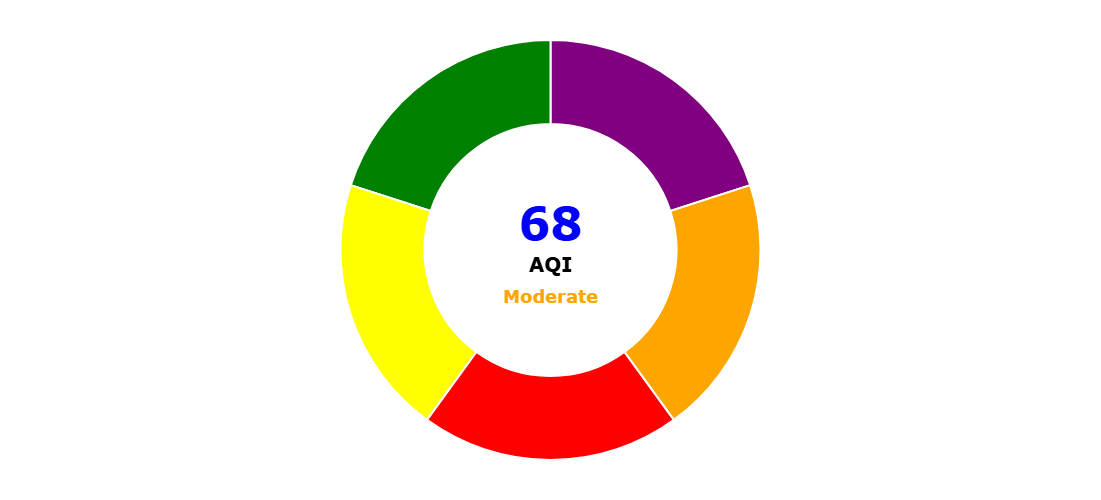

In [30]:
import plotly.graph_objects as go

# Custom AQI donut data
labels = ['Very Poor', 'Good', 'Moderate', 'Unhealthy', 'Satisfactory']
values = [20, 20, 20, 20, 20]  # equal segments

# Custom colors: purple, green, yellow, red, orange
colors = ['purple', 'green', 'yellow', 'red', 'orange']

# Create donut chart
fig = go.Figure(data=[go.Pie(    # go.Pie is used to create both pie and donut charts.
    labels=labels,
    values=values,
    hole=0.6,
    marker=dict(colors=colors, line=dict(color='white', width=2)),
    textinfo='none'  # hide slice labels
)])

# Add center text with extra spacing
fig.add_annotation(
    text="<b><span style='font-size:45px; color:blue;'>68</span><br><br>"
         "<span style='font-size:20px; color:black;'>AQI</span><br><br>"
         "<span style='font-size:18px; color:orange;'>Moderate</span></b>",
    x=0.5, y=0.5, showarrow=False       # showarrow=False ensures no arrow appears on the tex
)

# Layout adjustments
fig.update_layout(
    showlegend=False,
    width=500, height=500,
    margin=dict(t=40, b=40, l=40, r=40),
    paper_bgcolor='white'
)

fig.show()


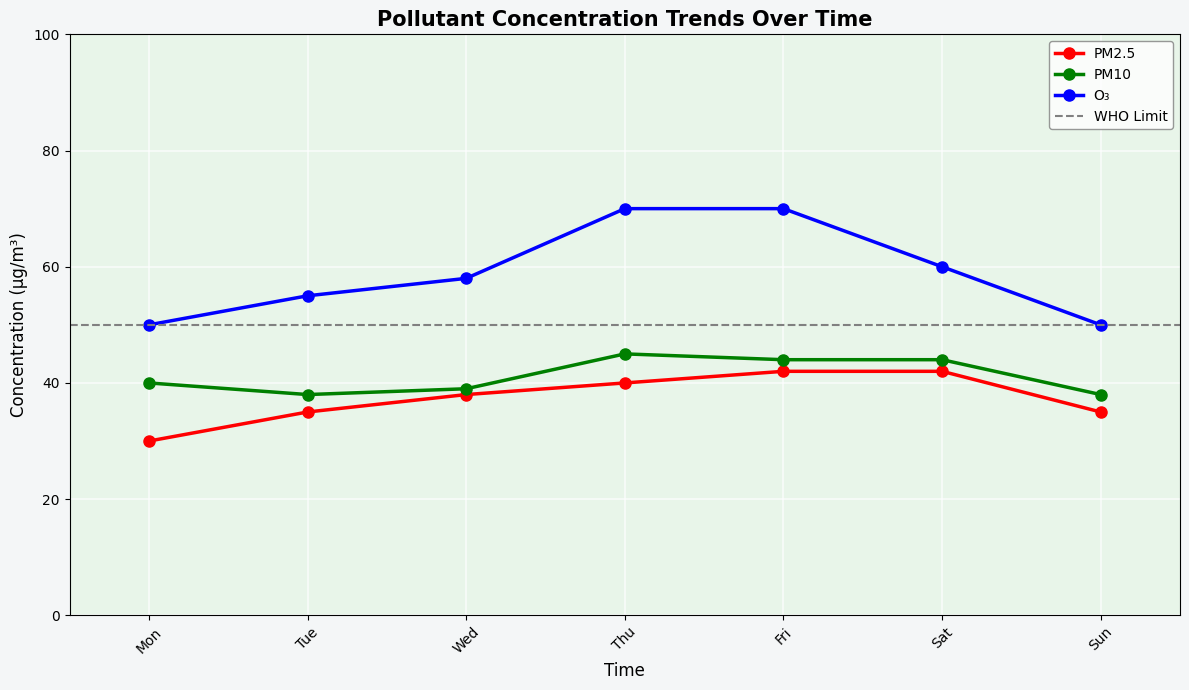

In [53]:
#Line Plot Visualization using Matplotlib
import matplotlib.pyplot as plt

# --- Days ---
time = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# --- Custom pollutant values per your description ---
pm25 = [30, 35, 38, 40, 42, 42, 35]  # Red
pm10 = [40, 38, 39, 45, 44, 44, 38]  # Green
o3   = [50, 55, 58, 70, 70, 60, 50]  # Blue

# --- Create figure ---
fig, ax = plt.subplots(figsize=(12, 7))
fig.patch.set_facecolor('#f4f6f7')
ax.set_facecolor('#e8f5e9')

# --- Plot pollutants ---
ax.plot(time, pm25, marker='o', markersize=8, color='red', linewidth=2.5, label='PM2.5')
ax.plot(time, pm10, marker='o', markersize=8, color='green', linewidth=2.5, label='PM10')
ax.plot(time, o3, marker='o', markersize=8, color='blue', linewidth=2.5, label='O₃')

# --- WHO threshold ---
ax.axhline(50, color='gray', linestyle='--', linewidth=1.5, label='WHO Limit')

# --- Set axis limits ---
ax.set_ylim(0, 100)
ax.set_xlim(-0.5, 6.5)

# --- Grid, title, labels ---
ax.grid(True, color='white', linestyle='-', linewidth=1.5, alpha=0.6)
plt.title("Pollutant Concentration Trends Over Time", fontsize=15, fontweight='bold', color='black')
plt.xlabel("Time", fontsize=12)
plt.ylabel("Concentration (µg/m³)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(frameon=True, facecolor='white', edgecolor='gray', fontsize=10)
plt.tight_layout()
plt.show()


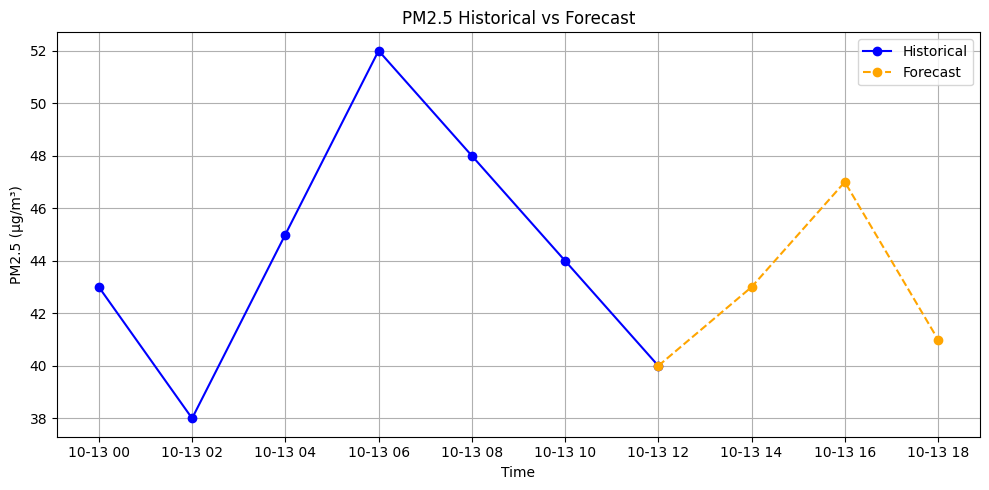

In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- Time series (10 points, every 2 hours) ---
time = pd.date_range(start='00:00', periods=10, freq='2h')

# --- Historical data (first 7 points) ---
Historical = [43, 38, 45, 52, 48, 44, 40, None, None, None]

# --- Forecast data starts from last historical value (40) ---
forecast = [None, None, None, None, None, None, 40, 43, 47, 41]

# --- Plot ---
plt.figure(figsize=(10,5))
plt.plot(time, Historical, marker='o', label='Historical', color='blue')
plt.plot(time, forecast, marker='o', label='Forecast', color='orange', linestyle='--')



# --- Labels and grid ---
plt.xlabel("Time")
plt.ylabel("PM2.5 (µg/m³)")
plt.title("PM2.5 Historical vs Forecast")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
